In [1]:
import uproot	
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
from scipy import stats
from methods.fit_linear_regression_model import fit_linear_regression_model
import sklearn
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
def round(n, k):
    # function to round number 'n' up/down to nearest 'k'
    # use positive k to round up
    # use negative k to round down

    return n - n % k

In [3]:
file = uproot.open(
    "tracking_losses_ntuple_B_rad_length_beginVelo2endVelo.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromB)]
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromB)]

electrons = allcolumns[
    (allcolumns.isElectron)
    & (allcolumns.fromB)
    & (allcolumns.eta <= 5.0)
    & (allcolumns.eta >= 1.5)
    & (np.abs(allcolumns.phi) < 3.142)
]

print(ak.num(found, axis=0), ak.num(lost, axis=0))
print(ak.num(electrons, axis=0))
# ak.count(found, axis=None)

41978 8523
49865


In [4]:
# variables

eta_a = ak.to_numpy(electrons["eta"])
phi_a = ak.to_numpy(electrons["phi"])
rad_length_frac_a = ak.to_numpy(electrons["rad_length_frac"])

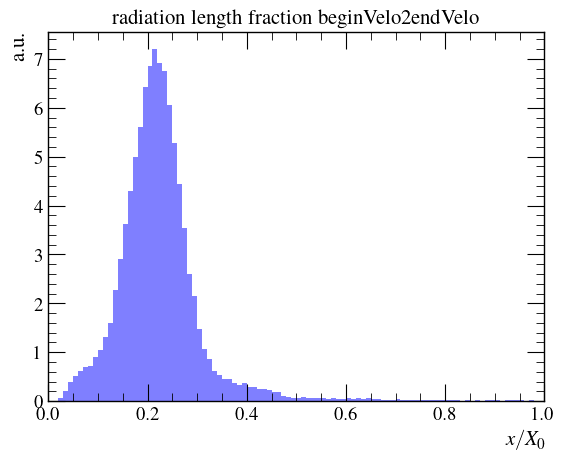

In [5]:
plt.hist(
    rad_length_frac_a,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    range=[0, 1],
)
plt.xlim(0, 1)
# plt.yscale("log")
plt.title("radiation length fraction beginVelo2endVelo")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")
plt.show()

In [38]:
df = pd.DataFrame({
    "phi": phi_a * 90.0 / np.pi,
    "eta": eta_a,
    "rad_length_frac": rad_length_frac_a,
})
df = df.round({"phi": 0, "eta": 1, "rad_length_frac": 4})

In [39]:
df_pivoted = df.pivot_table(
    index="eta",
    columns="phi",
    values="rad_length_frac",
    margins=False,
    fill_value=0,
)

In [40]:
df_pivoted

phi     -90.0     -89.0     -88.0     -87.0     -86.0     -85.0     -84.0  \
eta                                                                         
1.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.6  0.000000  0.355900  0.000000  0.526900  0.000000  0.000000  0.000000   
1.7  0.000000  0.253200  0.378900  0.459800  0.169100  0.179750  0.187200   
1.8  0.141700  0.420150  0.311400  0.370620  0.000000  0.162100  0.186800   
1.9  0.135300  0.000000  0.164100  0.388667  0.399800  0.243000  0.165000   
2.0  0.353400  0.308690  0.303800  0.396450  0.436400  0.269900  0.170950   
2.1  0.158200  0.232540  0.174500  0.259733  0.258775  0.205350  0.186400   
2.2  0.220000  0.225210  0.355058  0.344350  0.291310  0.198650  0.197100   
2.3  0.338300  0.249837  0.300908  0.230829  0.376617  0.163367  0.192200   
2.4  0.299714  0.245888  0.354560  0.263557  0.330100  0.240408  0.202240   
2.5  0.220817  0.310787  0.407230  0.271920  0.355700  0.243955  0.222678   
2.6  0.289325  0.340494  0.396958  0.356700  0.326283  0.234962  0.207600   
2.7  0.377340  0.309629  0.408500  0.395922  0.457153  0.245200  0.208144   
2.8  0.406600  0.422255  0.336575  0.463889  0.405786  0.275860  0.226343   
2.9  0.304183  0.299586  0.437578  0.310589  0.414592  0.250408  0.234600   
3.0  0.177300  0.208607  0.246791  0.234960  0.247550  0.242510  0.243250   
3.1  0.176850  0.174825  0.200000  0.216220  0.238011  0.223344  0.236530   
3.2  0.207217  0.190643  0.215775  0.195622  0.211843  0.222592  0.206457   
3.3  0.212500  0.178411  0.200142  0.205387  0.247040  0.214215  0.205026   
3.4  0.203900  0.229470  0.212793  0.225382  0.197680  0.207650  0.190145   
3.5  0.209767  0.209209  0.214618  0.193182  0.223942  0.226656  0.224200   
3.6  0.203100  0.199025  0.162311  0.218986  0.214600  0.202833  0.237267   
3.7  0.254600  0.220037  0.224288  0.228317  0.203760  0.202433  0.130050   
3.8  0.189386  0.212550  0.212787  0.218413  0.180314  0.182820  0.195475   
3.9  0.152200  0.173320  0.202150  0.224311  0.203382  0.180042  0.179955   
4.0  0.174950  0.188591  0.202700  0.200275  0.226100  0.202900  0.208282   
4.1  0.188150  0.182111  0.192187  0.182120  0.160708  0.180787  0.218877   
4.2  0.204350  0.204967  0.157154  0.230100  0.194117  0.193585  0.167480   
4.3  0.111900  0.163650  0.242429  0.170043  0.233867  0.242429  0.106900   
4.4  0.065600  0.179157  0.210950  0.198383  0.000000  0.248883  0.156400   
4.5  0.000000  0.193960  0.220067  0.188533  0.244800  0.140017  0.218725   
4.6  0.229400  0.155000  0.116629  0.205517  0.221433  0.203664  0.148467   
4.7  0.184300  0.232700  0.159950  0.144400  0.161300  0.134360  0.206125   
4.8  0.000000  0.107667  0.096550  0.181325  0.161300  0.281700  0.250350   
4.9  0.078100  0.099600  0.086867  0.078340  0.077900  0.089733  0.080800   
5.0  0.000000  0.075250  0.067500  0.070600  0.000000  0.057800  0.326000   

phi     -83.0     -82.0     -81.0  ...      81.0      82.0      83.0  \
eta                                ...                                 
1.5  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1.6  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1.7  0.000000  0.228125  0.177800  ...  0.124700  0.000000  0.000000   
1.8  0.159033  0.121133  0.222767  ...  0.159050  0.128229  0.148540   
1.9  0.143320  0.200000  0.000000  ...  0.157660  0.189700  0.159575   
2.0  0.177560  0.151720  0.162122  ...  0.152460  0.158525  0.185100   
2.1  0.167020  0.168629  0.163200  ...  0.183743  0.185325  0.192740   
2.2  0.194667  0.158688  0.167200  ...  0.179700  0.180930  0.190475   
2.3  0.163618  0.150042  0.178250  ...  0.181967  0.188125  0.184033   
2.4  0.182417  0.175910  0.164650  ...  0.182113  0.200911  0.197689   
2.5  0.227625  0.181771  0.177013  ...  0.186971  0.210333  0.198900   
2.6  0.213810  0.189312  0.183936  ...  0.202918  0.204109  0.231210   
2.7  0.227821  0.204533  0.200750  ...  0.207200  0.206678  0.231

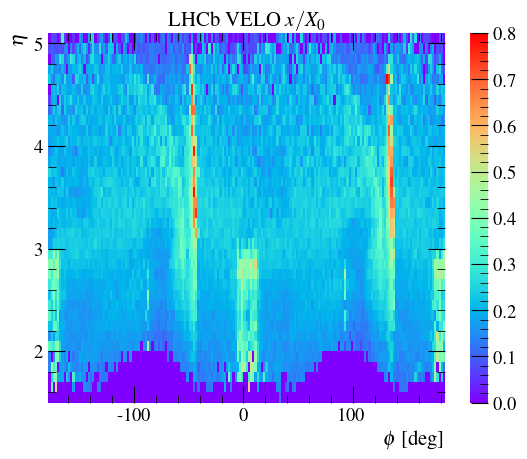

In [41]:
ax = sns.heatmap(
    df_pivoted,
    robust=True,
    square=False,
    cmap=colormaps["rainbow"],
    xticklabels=False,
    yticklabels=False,
    vmax=0.8,
)
ax.set_yticks([5, 15, 25, 35], [2, 3, 4, 5])
ax.set_xticks([39, 89, 139], [-100, 0, 100])
# ax.set_xticks([79, 179, 279], [-100, 0, 100])
ax.set_xlabel(f"$\phi$ [deg]")
ax.set_ylabel(f"$\eta$")

# ax.set_yticklabels([])
ax.invert_yaxis()
ax.set_title("LHCb VELO $x/X_0$")
plt.show()